# Unemployment Analysis

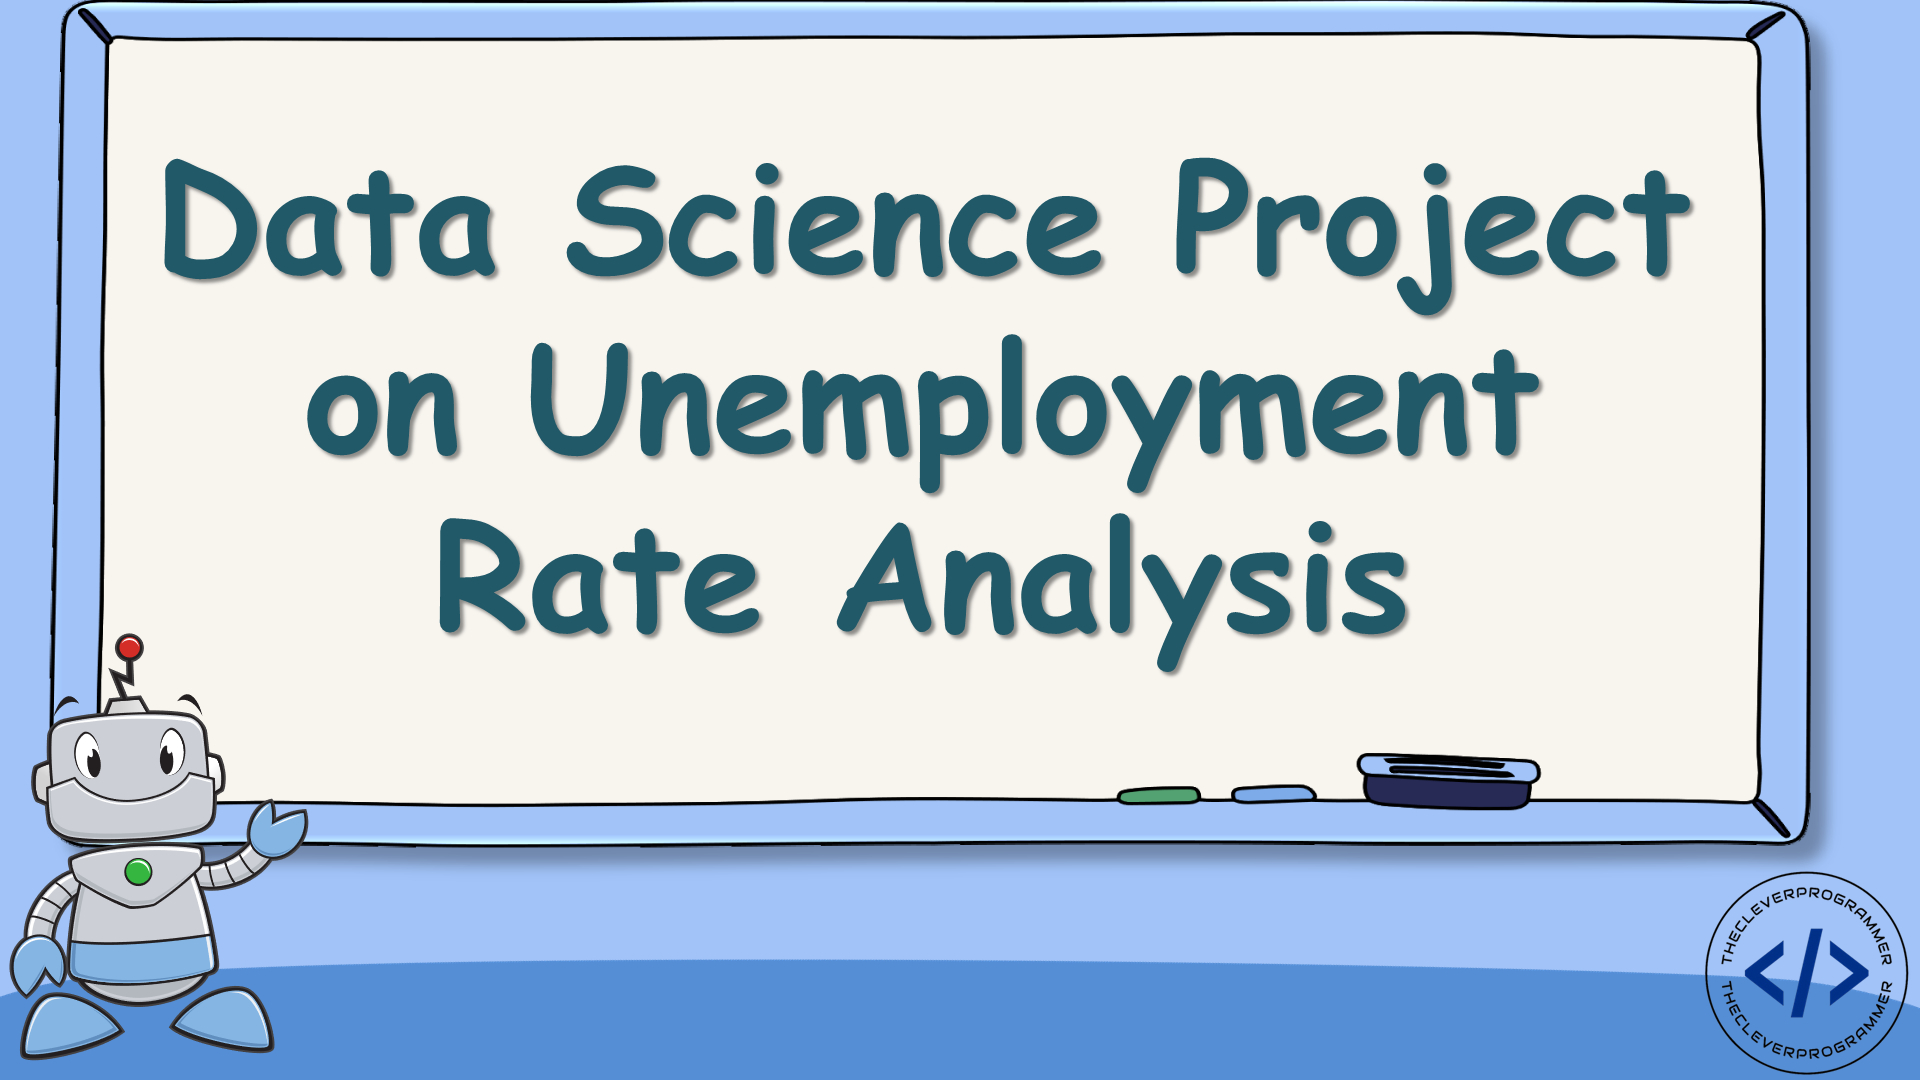

# Importing Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import calendar
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(style="darkgrid", font_scale=1.5)

# Loading Dataset

In [3]:
data_un = pd.read_csv("E:\Infobyte\Task-2 Unemployment/Unemployment_Rate_upto_11_2020.csv")
data_un

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.740
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.740
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.740
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.740
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.740
...,...,...,...,...,...,...,...,...,...
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855


In [5]:
data_un.columns = ["state","date","frequency","estimated unemployment rate (%)","estimated employed",
                   "estimated labour participation rate (%)","region","longitude","latitude"]

In [6]:
data_un.head(10)

,state,date,frequency,estimated unemployment rate (%),estimated employed,estimated labour participation rate (%),region,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74
5,Andhra Pradesh,30-06-2020,M,3.31,19805400,47.41,South,15.9129,79.74
6,Andhra Pradesh,31-07-2020,M,8.34,15431615,38.91,South,15.9129,79.74
7,Andhra Pradesh,31-08-2020,M,6.96,15251776,37.83,South,15.9129,79.74
8,Andhra Pradesh,30-09-2020,M,6.40,15220312,37.47,South,15.9129,79.74
9,Andhra Pradesh,31-10-2020,M,6.59,15157557,37.34,South,15.9129,79.74


In [7]:
data_un.tail(10)

,state,date,frequency,estimated unemployment rate (%),estimated employed,estimated labour participation rate (%),region,longitude,latitude
257,West Bengal,31-01-2020,M,6.94,35820789,47.35,East,22.9868,87.855
258,West Bengal,29-02-2020,M,4.92,36964178,47.74,East,22.9868,87.855
259,West Bengal,31-03-2020,M,6.92,35903917,47.27,East,22.9868,87.855
260,West Bengal,30-04-2020,M,17.41,26938836,39.90,East,22.9868,87.855
261,West Bengal,31-05-2020,M,17.41,28356675,41.92,East,22.9868,87.855
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855
266,West Bengal,31-10-2020,M,9.98,33962549,45.63,East,22.9868,87.855


In [8]:
data_un.shape

(267, 9)

In [9]:
data_un.columns

Index(['state', 'date', 'frequency', 'estimated unemployment rate (%)',
       'estimated employed', 'estimated labour participation rate (%)',
       'region', 'longitude', 'latitude'],
      dtype='object')

In [10]:
data_un.describe()

,estimated unemployment rate (%),estimated employed,estimated labour participation rate (%),longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


In [11]:
data_un.isnull().sum()

state                                      0
date                                       0
frequency                                  0
estimated unemployment rate (%)            0
estimated employed                         0
estimated labour participation rate (%)    0
region                                     0
longitude                                  0
latitude                                   0
dtype: int64

In [12]:
data_un.duplicated().any()

False

In [13]:
data_un.state.value_counts()

Andhra Pradesh      10
Assam               10
Uttarakhand         10
Uttar Pradesh       10
Tripura             10
Telangana           10
Tamil Nadu          10
Rajasthan           10
Punjab              10
Puducherry          10
Odisha              10
Meghalaya           10
Maharashtra         10
Madhya Pradesh      10
Kerala              10
Karnataka           10
Jharkhand           10
Himachal Pradesh    10
Haryana             10
Gujarat             10
Goa                 10
Delhi               10
Chhattisgarh        10
Bihar               10
West Bengal         10
Jammu & Kashmir      9
Sikkim               8
Name: state, dtype: int64

In [14]:
data_un.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   state                                    267 non-null    object 
 1   date                                     267 non-null    object 
 2   frequency                                267 non-null    object 
 3   estimated unemployment rate (%)          267 non-null    float64
 4   estimated employed                       267 non-null    int64  
 5   estimated labour participation rate (%)  267 non-null    float64
 6   region                                   267 non-null    object 
 7   longitude                                267 non-null    float64
 8   latitude                                 267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


### Changing the Data-Type of Date Attribute

In [15]:
data_un['date'] = pd.to_datetime(data_un['date'],dayfirst=True)

### Extracting Month

In [16]:
data_un['month_int'] = data_un['date'].dt.month
data_un.head()

,state,date,frequency,estimated unemployment rate (%),estimated employed,estimated labour participation rate (%),region,longitude,latitude,month_int
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74,1
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74,2
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74,3
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.74,4
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.74,5


In [17]:
data_un['month'] = data_un['month_int'].apply(lambda x: calendar.month_abbr[x])
data_un.head()

,state,date,frequency,estimated unemployment rate (%),estimated employed,estimated labour participation rate (%),region,longitude,latitude,month_int,month
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74,1,Jan
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74,2,Feb
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74,3,Mar
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.74,4,Apr
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.74,5,May


In [18]:
IND = data_un.groupby(["month"])[["estimated unemployment rate (%)","estimated employed",
                                  "estimated labour participation rate (%)"]].mean()

IND = pd.DataFrame(IND).reset_index()

# Data Analysis

###### Bar Plot of Unemployment Rate and Labour Participation Rate

In [19]:
month = IND['month']
unemployment_rate= IND["estimated unemployment rate (%)"]
labour_participation_rate= IND["estimated labour participation rate (%)"]

fig = go.Figure()

fig.add_trace(go.Bar (x = month, y = unemployment_rate, name= "Unemployment Rate"))
fig.add_trace(go.Bar (x = month, y = labour_participation_rate, name= "Labour Participation Rate"))

fig.update_layout (title="Unemployment Rate and Labour Participation Rate",
                   xaxis=dict(categoryorder='array',
                              categoryarray=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct"]))

fig.show(renderer='iframe')

###### Estimated Employed People in each month

In [20]:
fig = px.bar (IND, x='month',y='estimated employed', color="month", 
              category_orders = {"month": ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct"]}, 
              title='Estimated Employed People from Jan 2020 to Oct 2020')

fig.show(renderer='iframe')

###### State Wise Analysis

In [21]:
state = data_un.groupby(["state"])[["estimated unemployment rate (%)", "estimated employed",
                                    "estimated labour participation rate (%)"]].mean()

state = pd.DataFrame(state).reset_index()

In [22]:
# Box plot
fig = px.box(data_un, x='state',y='estimated unemployment rate (%)', color='state', title='Unemployment rate')
fig.update_layout (xaxis={'categoryorder': 'total descending'}) 
fig.show(renderer='iframe')

In [23]:
fig = px.bar(state, x='state', y="estimated unemployment rate (%)", color="state", title="Average Unemployment Rate (State)")

fig.update_layout(xaxis={'categoryorder':'total descending', 'tickangle': 65})

fig.show(renderer='iframe')

In [24]:
# Monthly Unemployment Rate

fig = px.bar(data_un, x='state',y='estimated unemployment rate (%)', animation_frame = 'month', color='state',
             title= 'Unemployment rate from Jan 2020 to Oct 2020 (State)')

fig.update_layout (xaxis={'categoryorder': 'total descending', 'tickangle': 55})

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"]=2000

fig.update_layout(updatemenus=[dict(x=0.1, y=-0.25)])
fig.update_layout(sliders=[dict(y=-0.25)])

fig.show(renderer='iframe')

In [26]:
fig = px.scatter_geo (data_un, 'longitude', 'latitude', color="state",
                      hover_name="state", size="estimated unemployment rate (%)",
                      animation_frame='month', scope='asia', title= 'Impact of Lockdown on Employment in India')

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 2000

fig.update_geos (lataxis_range=[5,40], lonaxis_range=[65, 100], oceancolor="Deepskyblue", showocean=True)

fig.show(renderer='iframe')

### Regional Analysis

In [27]:
data_un.region.unique()

array(['South', 'Northeast', 'East', 'West', 'North'], dtype=object)

In [28]:
region = data_un.groupby(["region"])[['estimated unemployment rate (%)', "estimated employed", 
                                   "estimated labour participation rate (%)"]].mean() 

region = pd.DataFrame(region).reset_index()

In [38]:
fig = px.scatter_matrix(data_un, dimensions=['estimated unemployment rate (%)', 'estimated employed',
                                          'estimated labour participation rate (%)'], color='region')

fig.show(renderer='iframe')

In [30]:
fig = px.bar(region, x="region", y="estimated unemployment rate (%)", color="region",
              title="Average Unemployment Rate (Region)")

fig.update_layout(xaxis={'categoryorder': 'total descending'})
                          
fig.show(renderer='iframe')

In [31]:
fig = px.bar(data_un, x='region', y='estimated unemployment rate (%)', animation_frame = 'month', color='state',
             title="Unemployment rate from Jan 2020 to Oct 2020")

fig.update_layout (xaxis={'categoryorder': 'total descending'})

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 2000

fig.show(renderer='iframe')

In [32]:
unemployment = data_un.groupby(['region','state'])['estimated unemployment rate (%)'].mean().reset_index()

unemployment.head()

,region,state,estimated unemployment rate (%)
0,East,Bihar,19.471
1,East,Jharkhand,19.539
2,East,Odisha,6.462
3,East,West Bengal,10.192
4,North,Delhi,18.414


In [33]:
fig = px.sunburst (unemployment, path=['region', 'state'], values='estimated unemployment rate (%)', 
                   title= 'Unemployment Rate in every State and Region', height=650) 

fig.show(renderer='iframe')

## Unemployment Rate Before and After Lockdown

In [34]:
before_lockdown = data_un[(data_un['month_int'] >= 1) & (data_un['month_int'] <4)] 

after_lockdown = data_un[(data_un['month_int'] >= 4) & (data_un['month_int'] <=6)]

In [35]:
af_lockdown = after_lockdown.groupby('state')['estimated unemployment rate (%)'].mean().reset_index()

lockdown = before_lockdown.groupby('state')['estimated unemployment rate (%)'].mean().reset_index() 
lockdown ['unemployment rate before lockdown'] = af_lockdown [ 'estimated unemployment rate (%)']

lockdown.columns = ['state', 'unemployment rate before lockdown', 'unemployment rate after lockdown']
lockdown.head()

,state,unemployment rate before lockdown,unemployment rate after lockdown
0,Andhra Pradesh,5.700000,13.750000
1,Assam,4.613333,7.070000
2,Bihar,12.110000,36.806667
3,Chhattisgarh,8.523333,9.380000
4,Delhi,18.036667,25.713333


In [36]:
lockdown['rate change in unemployment'] = round(lockdown['unemployment rate before lockdown'] -
                                                lockdown['unemployment rate before lockdown']
                                                /lockdown['unemployment rate after lockdown'] ,2)

In [37]:
fig = px.bar (lockdown, x='state',y='rate change in unemployment', color="rate change in unemployment",
              title='Percentage change in Unemployment Rate in each State after Lockdown', template="ggplot2")

fig.update_layout(xaxis={'categoryorder': 'total ascending'}) 
                         
fig.show(renderer='iframe')

##### END